In [1]:
##Emsamble methods

# Bagging
#Bootstrap sampling: Sampling with replacement
#Combine by averiging the output (regression)
#Combine by voting (classification)
#Can be applied to many classifiers which inlcudes ANN, CART, etc

# Pasting
#Sampling without replacement

# Boosting
#Train week classifiers
#Add them to a final strong classfier by weighting. Weighting by accuracy (typically)
#Once added, the data are reweighted
  # misclassified samples gain weight
  # correctly classified samples lose weight (exception: Boost by majority and BrownBoost - decrease the wegiht of repeatedly misclassfied examples)
  # Algo are forced to learn more from misclassified samples

# Stacking
#Stacked generalization
#Combined information from multiple predictive models to generate a new model
#Step 1: Train learning alo
#Step 2: Combiner algo is trained using algo predictions from step 1

# Bayes optimal classifier
# Bayesian parameter averaging
# Bayesian model combination
# Bucket of models


In [1]:
#%% Bagging

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df = sns.load_dataset('titanic')
df.head()

#%%

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
df.shape

(891, 15)

In [4]:
#df.dropna(inplace=True)
df['pclass'].unique()

array([3, 1, 2])

In [5]:
df['pclass'].value_counts()

,count
pclass,
3,491
1,216
2,184


In [6]:
df['sex'].value_counts()

,count
sex,
male,577
female,314


In [7]:
df.shape

(891, 15)

In [9]:
#%% Data preprocessing
subset = df[['pclass','sex','age','survived']].copy()
subset.dropna(inplace=True)
X = subset[['pclass','sex','age']].copy()

from sklearn import preprocessing
le = preprocessing.LabelEncoder()

X['sex'] = le.fit_transform(subset['sex'])

In [10]:
X.head()

,pclass,sex,age
0,3,1,22.0
1,1,0,38.0
2,3,0,26.0
3,1,0,35.0
4,3,1,35.0


In [11]:
X.describe()

,pclass,sex,age
count,714.000000,714.000000,714.000000
mean,2.236695,0.634454,29.699118
std,0.838250,0.481921,14.526497
min,1.000000,0.000000,0.420000
25%,1.000000,0.000000,20.125000
50%,2.000000,1.000000,28.000000
75%,3.000000,1.000000,38.000000
max,3.000000,1.000000,80.000000


In [12]:
Y = subset['survived'].copy()
Y.value_counts()

,count
survived,
0,424
1,290


In [13]:
#%% Fit Model
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

In [7]:
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, roc_auc_score

def print_score(clf, X_train, X_test, Y_train, Y_test, train=True):
    lb = preprocessing.LabelBinarizer()
    lb.fit(Y_train)
    if train:

      res = clf.predict(X_train)
      print("Train Result:\n================================================")
      print("accuracy score: {0:.4f}\n".format(accuracy_score(Y_train, res)))
      print("Classification Report: {}\n".format(classification_report(Y_train, res)))
      print("Confusion matrix: {}\n".format(confusion_matrix(Y_train, res)))
      print("ROC AUC: {0:.4f}\n".format(roc_auc_score(lb.transform(Y_train), lb.transform(res))))

      res = cross_val_score(clf, X_train, Y_train, cv=10, scoring='accuracy')
      print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
      print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))
      print("------------------------------------------------------------------------------------------------------")

    elif train==False:
      res_test = clf.predict(X_test)
      print("Test Result:\n================================================")
      print("accuracy score: {0:.4f}\n".format(accuracy_score(Y_test, res_test)))
      print("Classification Report: {}\n".format(classification_report(Y_test, res_test)))
      print("Confusion matrix: {}\n".format(confusion_matrix(Y_test, res_test)))
      print("ROC AUC: {0:.4f}\n".format(roc_auc_score(lb.transform(Y_test), lb.transform(res_test))))

      #res_test = cross_val_score(clf, X_test, Y_test, cv=10, scoring='accuracy')
      #print("Average Accuracy: \t {0:.4f}".format(np.mean(res_test)))
      #print("Accuracy SD: \t\t {0:.4f}".format(np.std(res_test)))
      print("------------------------------------------------------------------------------------------------------")

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, Y_train)
print_score(clf,X_train,X_test,Y_train,Y_test,train=True)
print_score(clf,X_train,X_test,Y_train,Y_test,train=False)

Train Result:
accuracy score: 1.0000

Classification Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00       182
           1       1.00      1.00      1.00       920

    accuracy                           1.00      1102
   macro avg       1.00      1.00      1.00      1102
weighted avg       1.00      1.00      1.00      1102


Confusion matrix: [[182   0]
 [  0 920]]

ROC AUC: 1.0000

Average Accuracy: 	 0.7977
Accuracy SD: 		 0.0271
------------------------------------------------------------------------------------------------------
Test Result:
accuracy score: 0.7989

Classification Report:               precision    recall  f1-score   support

           0       0.34      0.38      0.36        55
           1       0.89      0.87      0.88       313

    accuracy                           0.80       368
   macro avg       0.62      0.63      0.62       368
weighted avg       0.81      0.80      0.80       368


Confusion m

In [15]:
#%% Bagging (oob_Score=False)

bag_clf = BaggingClassifier(estimator=clf, n_estimators=1000, bootstrap=True, n_jobs=-1, random_state=42)
bag_clf.fit(X_train, Y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(random_state=42),
                  n_estimators=1000, n_jobs=-1, random_state=42)

In [16]:
print_score(bag_clf,X_train,X_test,Y_train,Y_test,train=True)
print_score(bag_clf,X_train,X_test,Y_train,Y_test,train=False)

Train Result:
accuracy score: 0.9158

Classification Report:               precision    recall  f1-score   support

           0       0.90      0.96      0.93       297
           1       0.94      0.85      0.89       202

    accuracy                           0.92       499
   macro avg       0.92      0.90      0.91       499
weighted avg       0.92      0.92      0.92       499


Confusion matrix: [[286  11]
 [ 31 171]]

ROC AUC: 0.9047

Average Accuracy: 	 0.8036
Accuracy SD: 		 0.0472
------------------------------------------------------------------------------------------------------
Test Result:
accuracy score: 0.7721

Classification Report:               precision    recall  f1-score   support

           0       0.81      0.80      0.81       127
           1       0.72      0.73      0.72        88

    accuracy                           0.77       215
   macro avg       0.76      0.77      0.76       215
weighted avg       0.77      0.77      0.77       215


Confusion m

In [17]:
#%% Bagging (oob_Score=True)

bag_clf = BaggingClassifier(estimator=clf, n_estimators=1000, bootstrap=True, oob_score=True, n_jobs=-1, random_state=42)
bag_clf.fit(X_train, Y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(random_state=42),
                  n_estimators=1000, n_jobs=-1, oob_score=True,
                  random_state=42)

In [18]:
print_score(bag_clf,X_train,X_test,Y_train,Y_test,train=True)
print_score(bag_clf,X_train,X_test,Y_train,Y_test,train=False)

Train Result:
accuracy score: 0.9158

Classification Report:               precision    recall  f1-score   support

           0       0.90      0.96      0.93       297
           1       0.94      0.85      0.89       202

    accuracy                           0.92       499
   macro avg       0.92      0.90      0.91       499
weighted avg       0.92      0.92      0.92       499


Confusion matrix: [[286  11]
 [ 31 171]]

ROC AUC: 0.9047

Average Accuracy: 	 0.8036
Accuracy SD: 		 0.0472
------------------------------------------------------------------------------------------------------
Test Result:
accuracy score: 0.7721

Classification Report:               precision    recall  f1-score   support

           0       0.81      0.80      0.81       127
           1       0.72      0.73      0.72        88

    accuracy                           0.77       215
   macro avg       0.76      0.77      0.76       215
weighted avg       0.77      0.77      0.77       215


Confusion m

In [19]:
bag_clf.oob_score_

0.811623246492986

In [20]:
#%% Bagging with Random Forest
# Random Forrest
#Ensemble of Decission Trees
#Training via the bagging method (Repeated sampling with replacement)
  #Bagging: Sample from samples
  #RF: Sample from predictions. m = sqrt(p) for classification and m = p/3 for regression problems
#Utilise uncorrelated trees
#RF: Sample both observatins and features of training data
#Bagging: Samples only observations at random, Decission tree select best feature when splitting a node

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1)

rf_clf = RandomForestClassifier(random_state=42, n_estimators=100)
rf_clf.fit(X_train, Y_train)

print_score(rf_clf,X_train,X_test,Y_train,Y_test,train=True)
print_score(rf_clf,X_train,X_test,Y_train,Y_test,train=False)



Train Result:
accuracy score: 0.8956

Classification Report:               precision    recall  f1-score   support

           0       0.88      0.95      0.91       375
           1       0.92      0.82      0.87       267

    accuracy                           0.90       642
   macro avg       0.90      0.88      0.89       642
weighted avg       0.90      0.90      0.89       642


Confusion matrix: [[356  19]
 [ 48 219]]

ROC AUC: 0.8848

Average Accuracy: 	 0.8021
Accuracy SD: 		 0.0551
------------------------------------------------------------------------------------------------------
Test Result:
accuracy score: 0.8194

Classification Report:               precision    recall  f1-score   support

           0       0.86      0.88      0.87        49
           1       0.73      0.70      0.71        23

    accuracy                           0.82        72
   macro avg       0.79      0.79      0.79        72
weighted avg       0.82      0.82      0.82        72


Confusion m

In [21]:
# Grid Search to seek out the best hyperparameters for our ML model
from sklearn.pipeline import Pipeline

from sklearn.model_selection import GridSearchCV

rf_clf = RandomForestClassifier(random_state=42, n_estimators=100)

params_grid = {"max_depth": [3, None],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

grid_search = GridSearchCV(rf_clf, params_grid, n_jobs = -1, cv = 5, verbose = 1,scoring='accuracy')
grid_search.fit(X_train, Y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [3, None], 'min_samples_leaf': [1, 3, 10],
                         'min_samples_split': [2, 3, 10]},
             scoring='accuracy', verbose=1)

In [22]:
grid_search.best_score_

np.float64(0.8006056201550388)

In [23]:
grid_search.best_estimator_.get_params()

{'bootstrap': False,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [24]:
print_score(grid_search,X_train,X_test,Y_train,Y_test,train=True)
print_score(grid_search,X_train,X_test,Y_train,Y_test,train=False)

Train Result:
accuracy score: 0.8707

Classification Report:               precision    recall  f1-score   support

           0       0.85      0.94      0.89       375
           1       0.90      0.78      0.83       267

    accuracy                           0.87       642
   macro avg       0.88      0.86      0.86       642
weighted avg       0.87      0.87      0.87       642


Confusion matrix: [[352  23]
 [ 60 207]]

ROC AUC: 0.8570

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360

In [25]:
# Extra-Trees (Extremely Randomized Trees Ensemble)
#Random Forrest is build uppon Decission Tree
#Decission Tree node splitting is based on gini or entropy or some other algorithms
#Extra trees make use of random thresholds for each feature unlike Decission Tree

from sklearn.ensemble import ExtraTreesClassifier

xt_clf = ExtraTreesClassifier(random_state=42, n_estimators=100)
xt_clf.fit(X_train, Y_train)

print_score(xt_clf,X_train,X_test,Y_train,Y_test,train=True)
print_score(xt_clf,X_train,X_test,Y_train,Y_test,train=False)

Train Result:
accuracy score: 0.8956

Classification Report:               precision    recall  f1-score   support

           0       0.87      0.97      0.92       375
           1       0.94      0.80      0.86       267

    accuracy                           0.90       642
   macro avg       0.91      0.88      0.89       642
weighted avg       0.90      0.90      0.89       642


Confusion matrix: [[362  13]
 [ 54 213]]

ROC AUC: 0.8815

Average Accuracy: 	 0.8100
Accuracy SD: 		 0.0457
------------------------------------------------------------------------------------------------------
Test Result:
accuracy score: 0.8750

Classification Report:               precision    recall  f1-score   support

           0       0.87      0.96      0.91        49
           1       0.89      0.70      0.78        23

    accuracy                           0.88        72
   macro avg       0.88      0.83      0.85        72
weighted avg       0.88      0.88      0.87        72


Confusion m

In [26]:
# Boosting (AdaBoost)

#The algo could learn from past mistakes by focussing more on difficult problems.

from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(random_state=42, n_estimators=100)
ada_clf.fit(X_train, Y_train)

AdaBoostClassifier(n_estimators=100, random_state=42)

In [27]:
print_score(ada_clf,X_train,X_test,Y_train,Y_test,train=True)
print_score(ada_clf,X_train,X_test,Y_train,Y_test,train=False)

Train Result:
accuracy score: 0.8037

Classification Report:               precision    recall  f1-score   support

           0       0.84      0.82      0.83       375
           1       0.76      0.78      0.77       267

    accuracy                           0.80       642
   macro avg       0.80      0.80      0.80       642
weighted avg       0.80      0.80      0.80       642


Confusion matrix: [[309  66]
 [ 60 207]]

ROC AUC: 0.7996

Average Accuracy: 	 0.7976
Accuracy SD: 		 0.0448
------------------------------------------------------------------------------------------------------
Test Result:
accuracy score: 0.8611

Classification Report:               precision    recall  f1-score   support

           0       0.88      0.92      0.90        49
           1       0.81      0.74      0.77        23

    accuracy                           0.86        72
   macro avg       0.85      0.83      0.84        72
weighted avg       0.86      0.86      0.86        72


Confusion m

In [28]:
#AdaBoost with RF
from sklearn.ensemble import RandomForestClassifier
ada_clf = AdaBoostClassifier(RandomForestClassifier(random_state=42, n_estimators=100), random_state=42, n_estimators=100)
ada_clf.fit(X_train, Y_train)

AdaBoostClassifier(estimator=RandomForestClassifier(random_state=42),
                   n_estimators=100, random_state=42)

In [29]:
print_score(ada_clf,X_train,X_test,Y_train,Y_test,train=True)
print_score(ada_clf,X_train,X_test,Y_train,Y_test,train=False)

Train Result:
accuracy score: 0.8956

Classification Report:               precision    recall  f1-score   support

           0       0.89      0.94      0.91       375
           1       0.91      0.84      0.87       267

    accuracy                           0.90       642
   macro avg       0.90      0.89      0.89       642
weighted avg       0.90      0.90      0.89       642


Confusion matrix: [[352  23]
 [ 44 223]]

ROC AUC: 0.8869

Average Accuracy: 	 0.8130
Accuracy SD: 		 0.0431
------------------------------------------------------------------------------------------------------
Test Result:
accuracy score: 0.8333

Classification Report:               precision    recall  f1-score   support

           0       0.86      0.90      0.88        49
           1       0.76      0.70      0.73        23

    accuracy                           0.83        72
   macro avg       0.81      0.80      0.80        72
weighted avg       0.83      0.83      0.83        72


Confusion m

In [30]:
# Gradient boosting
# Sequentl adding predictors

from sklearn.ensemble import GradientBoostingClassifier

gbc_clf = GradientBoostingClassifier(random_state=42, n_estimators=100)
gbc_clf.fit(X_train, Y_train)

GradientBoostingClassifier(random_state=42)

In [31]:
print_score(gbc_clf,X_train,X_test,Y_train,Y_test,train=True)
print_score(gbc_clf,X_train,X_test,Y_train,Y_test,train=False)

Train Result:
accuracy score: 0.8598

Classification Report:               precision    recall  f1-score   support

           0       0.85      0.93      0.89       375
           1       0.88      0.76      0.82       267

    accuracy                           0.86       642
   macro avg       0.86      0.85      0.85       642
weighted avg       0.86      0.86      0.86       642


Confusion matrix: [[348  27]
 [ 63 204]]

ROC AUC: 0.8460

Average Accuracy: 	 0.7882
Accuracy SD: 		 0.0474
------------------------------------------------------------------------------------------------------
Test Result:
accuracy score: 0.8750

Classification Report:               precision    recall  f1-score   support

           0       0.90      0.92      0.91        49
           1       0.82      0.78      0.80        23

    accuracy                           0.88        72
   macro avg       0.86      0.85      0.85        72
weighted avg       0.87      0.88      0.87        72


Confusion m

In [33]:
# Extreme Gradient Boosting XGBoost
#XGBoost used a more regularized model formalization to control over-fitting, which gives it better performance
#For model, it might be more suitable to be called as regularized gradient boosting
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1)
import xgboost as xgb

xgb_clf = xgb.XGBClassifier(max_depth=5, n_estimators=10000, learning_rate=0.3,n_jobs=-1)
xgb_clf.fit(X_train, Y_train)

ModuleNotFoundError: No module named 'xgboost'

In [35]:
print_score(xgb_clf,X_train,X_test,Y_train,Y_test,train=True)
print_score(xgb_clf,X_train,X_test,Y_train,Y_test,train=False)

Train Result:
accuracy score: 0.9081

Classification Report:               precision    recall  f1-score   support

           0       0.90      0.96      0.93       392
           1       0.92      0.83      0.88       250

    accuracy                           0.91       642
   macro avg       0.91      0.89      0.90       642
weighted avg       0.91      0.91      0.91       642


Confusion matrix: [[375  17]
 [ 42 208]]

ROC AUC: 0.8943

Average Accuracy: 	 0.8161
Accuracy SD: 		 0.0637
------------------------------------------------------------------------------------------------------
Test Result:
accuracy score: 0.7361

Classification Report:               precision    recall  f1-score   support

           0       0.67      0.81      0.73        32
           1       0.82      0.68      0.74        40

    accuracy                           0.74        72
   macro avg       0.74      0.74      0.74        72
weighted avg       0.75      0.74      0.74        72


Confusion m

In [2]:
# Project HR

from google.colab import files
uploaded = files.upload()

Saving WA_Fn-UseC_-HR-Employee-Attrition.csv to WA_Fn-UseC_-HR-Employee-Attrition.csv


In [39]:
ls

sample_data/  WA_Fn-UseC_-HR-Employee-Attrition.csv


In [3]:
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [38]:
num_col = list(df.describe().columns) #numerical columns
col_categorical = list(set(df.columns).difference(num_col)) #categorical columns
remove_list = ['EmployeeCount','EmployeeNumber','StandardHours'] #Useless columns
col_numerical = [e for e in num_col if e not in remove_list]
df['Attrition_num'] = df['Attrition'].map({'Yes':0,'No':1})
col_categorical.remove('Attrition')
df_cat = pd.get_dummies(df[col_categorical])
X = pd.concat([df[col_numerical],df_cat],axis=1)
Y = df['Attrition_num']

In [36]:
#Decission Tree
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=42)

clf.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=42)

In [37]:
X_train.shape

(1102, 52)

In [8]:
print_score(clf,X_train,X_test,Y_train,Y_test,train=True)
print_score(clf,X_train,X_test,Y_train,Y_test,train=False)

Train Result:
accuracy score: 1.0000

Classification Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00       182
           1       1.00      1.00      1.00       920

    accuracy                           1.00      1102
   macro avg       1.00      1.00      1.00      1102
weighted avg       1.00      1.00      1.00      1102


Confusion matrix: [[182   0]
 [  0 920]]

ROC AUC: 1.0000

Average Accuracy: 	 0.7977
Accuracy SD: 		 0.0271
------------------------------------------------------------------------------------------------------
Test Result:
accuracy score: 0.7989

Classification Report:               precision    recall  f1-score   support

           0       0.34      0.38      0.36        55
           1       0.89      0.87      0.88       313

    accuracy                           0.80       368
   macro avg       0.62      0.63      0.62       368
weighted avg       0.81      0.80      0.80       368


Confusion m

In [9]:
#Bagging
from sklearn.ensemble import BaggingClassifier

bag_clf = BaggingClassifier(estimator=clf, n_estimators=100, bootstrap=True, oob_score=False, n_jobs=-1, random_state=42)
bag_clf.fit(X_train, Y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(random_state=42),
                  n_estimators=100, n_jobs=-1, random_state=42)

In [10]:
print_score(bag_clf,X_train,X_test,Y_train,Y_test,train=True)
print_score(bag_clf,X_train,X_test,Y_train,Y_test,train=False)

Train Result:
accuracy score: 1.0000

Classification Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00       182
           1       1.00      1.00      1.00       920

    accuracy                           1.00      1102
   macro avg       1.00      1.00      1.00      1102
weighted avg       1.00      1.00      1.00      1102


Confusion matrix: [[182   0]
 [  0 920]]

ROC AUC: 1.0000

Average Accuracy: 	 0.8548
Accuracy SD: 		 0.0239
------------------------------------------------------------------------------------------------------
Test Result:
accuracy score: 0.8614

Classification Report:               precision    recall  f1-score   support

           0       0.62      0.18      0.28        55
           1       0.87      0.98      0.92       313

    accuracy                           0.86       368
   macro avg       0.75      0.58      0.60       368
weighted avg       0.84      0.86      0.83       368


Confusion m

In [11]:
#Random Forrest
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100)
rf_clf.fit(X_train, Y_train.ravel())

<ipython-input-11-9ef0576e214b>:5: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  rf_clf.fit(X_train, Y_train.ravel())


RandomForestClassifier()

In [12]:
print_score (rf_clf,X_train,X_test,Y_train,Y_test,train=True)
print_score (rf_clf,X_train,X_test,Y_train,Y_test,train=False)

Train Result:
accuracy score: 1.0000

Classification Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00       182
           1       1.00      1.00      1.00       920

    accuracy                           1.00      1102
   macro avg       1.00      1.00      1.00      1102
weighted avg       1.00      1.00      1.00      1102


Confusion matrix: [[182   0]
 [  0 920]]

ROC AUC: 1.0000

Average Accuracy: 	 0.8530
Accuracy SD: 		 0.0249
------------------------------------------------------------------------------------------------------
Test Result:
accuracy score: 0.8750

Classification Report:               precision    recall  f1-score   support

           0       1.00      0.16      0.28        55
           1       0.87      1.00      0.93       313

    accuracy                           0.88       368
   macro avg       0.94      0.58      0.61       368
weighted avg       0.89      0.88      0.83       368


Confusion m

<Axes: >

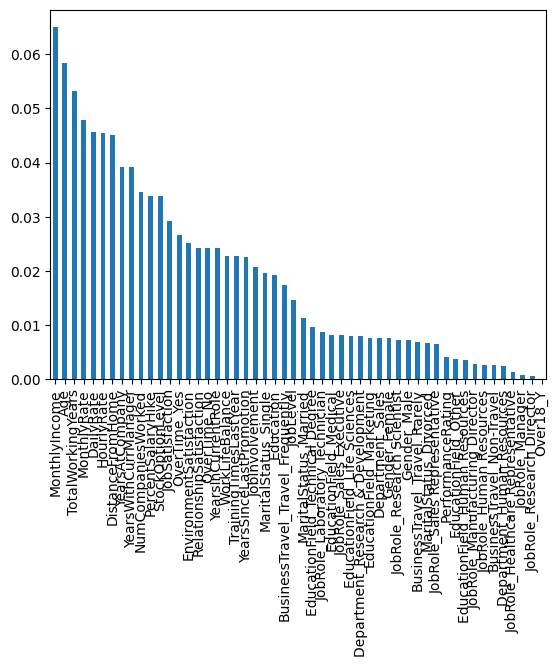

In [13]:
import seaborn as sns
pd.Series(rf_clf.feature_importances_, index=X.columns).sort_values(ascending=False).plot.bar()

In [14]:
#AdaBoost Tree
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier()
ada_clf.fit(X_train, Y_train)

AdaBoostClassifier()

In [15]:
print_score (ada_clf,X_train,X_test,Y_train,Y_test,train=True)
print_score (ada_clf,X_train,X_test,Y_train,Y_test,train=False)

Train Result:
accuracy score: 0.8802

Classification Report:               precision    recall  f1-score   support

           0       0.87      0.32      0.47       182
           1       0.88      0.99      0.93       920

    accuracy                           0.88      1102
   macro avg       0.87      0.66      0.70      1102
weighted avg       0.88      0.88      0.86      1102


Confusion matrix: [[ 59 123]
 [  9 911]]

ROC AUC: 0.6572

Average Accuracy: 	 0.8639
Accuracy SD: 		 0.0227
------------------------------------------------------------------------------------------------------
Test Result:
accuracy score: 0.8913

Classification Report:               precision    recall  f1-score   support

           0       0.86      0.33      0.47        55
           1       0.89      0.99      0.94       313

    accuracy                           0.89       368
   macro avg       0.88      0.66      0.71       368
weighted avg       0.89      0.89      0.87       368


Confusion m

In [16]:
#AdaBoost + RF
ada_clf = AdaBoostClassifier(RandomForestClassifier(n_estimators=100),n_estimators=100)
ada_clf.fit(X_train, Y_train)

AdaBoostClassifier(estimator=RandomForestClassifier(), n_estimators=100)

In [17]:
print_score (ada_clf,X_train,X_test,Y_train,Y_test,train=True)
print_score (ada_clf,X_train,X_test,Y_train,Y_test,train=False)

Train Result:
accuracy score: 1.0000

Classification Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00       182
           1       1.00      1.00      1.00       920

    accuracy                           1.00      1102
   macro avg       1.00      1.00      1.00      1102
weighted avg       1.00      1.00      1.00      1102


Confusion matrix: [[182   0]
 [  0 920]]

ROC AUC: 1.0000

Average Accuracy: 	 0.8621
Accuracy SD: 		 0.0221
------------------------------------------------------------------------------------------------------
Test Result:
accuracy score: 0.8723

Classification Report:               precision    recall  f1-score   support

           0       1.00      0.15      0.25        55
           1       0.87      1.00      0.93       313

    accuracy                           0.87       368
   macro avg       0.93      0.57      0.59       368
weighted avg       0.89      0.87      0.83       368


Confusion m

In [18]:
#Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

gbc_clf = GradientBoostingClassifier(n_estimators=100)
gbc_clf.fit(X_train, Y_train)

GradientBoostingClassifier()

In [19]:
print_score (gbc_clf,X_train,X_test,Y_train,Y_test,train=True)
print_score (gbc_clf,X_train,X_test,Y_train,Y_test,train=False)

Train Result:
accuracy score: 0.9628

Classification Report:               precision    recall  f1-score   support

           0       0.99      0.78      0.87       182
           1       0.96      1.00      0.98       920

    accuracy                           0.96      1102
   macro avg       0.98      0.89      0.93      1102
weighted avg       0.96      0.96      0.96      1102


Confusion matrix: [[142  40]
 [  1 919]]

ROC AUC: 0.8896

Average Accuracy: 	 0.8539
Accuracy SD: 		 0.0252
------------------------------------------------------------------------------------------------------
Test Result:
accuracy score: 0.8859

Classification Report:               precision    recall  f1-score   support

           0       0.71      0.40      0.51        55
           1       0.90      0.97      0.94       313

    accuracy                           0.89       368
   macro avg       0.81      0.69      0.72       368
weighted avg       0.87      0.89      0.87       368


Confusion m

In [20]:
#XGboost
import xgboost as xgb

xgb_clf = xgb.XGBClassifier(n_estimators=100)
xgb_clf.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [21]:
print_score (xgb_clf,X_train,X_test,Y_train,Y_test,train=True)
print_score (xgb_clf,X_train,X_test,Y_train,Y_test,train=False)

Train Result:
accuracy score: 1.0000

Classification Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00       182
           1       1.00      1.00      1.00       920

    accuracy                           1.00      1102
   macro avg       1.00      1.00      1.00      1102
weighted avg       1.00      1.00      1.00      1102


Confusion matrix: [[182   0]
 [  0 920]]

ROC AUC: 1.0000

Average Accuracy: 	 0.8585
Accuracy SD: 		 0.0241
------------------------------------------------------------------------------------------------------
Test Result:
accuracy score: 0.8832

Classification Report:               precision    recall  f1-score   support

           0       0.73      0.35      0.47        55
           1       0.89      0.98      0.93       313

    accuracy                           0.88       368
   macro avg       0.81      0.66      0.70       368
weighted avg       0.87      0.88      0.86       368


Confusion m

In [22]:
# Ensemble of Ensembles - Model stacking
#Use the probability prediction of several other ensemble methods

en_en = pd.DataFrame()

en_en['tree_clf'] = pd.DataFrame(clf.predict_proba(X_train))[1]
en_en['rf_clf'] = pd.DataFrame(rf_clf.predict_proba(X_train))[1]
col_name = en_en.columns
en_en = pd.concat([en_en, pd.DataFrame(Y_train).reset_index(drop=True)],axis=1)
en_en.head()

,tree_clf,rf_clf,Attrition_num
0,1.0,0.95,1
1,0.0,0.20,0
2,0.0,0.23,0
3,1.0,0.92,1
4,1.0,0.95,1


In [23]:
tmp = list(col_name)
tmp.append('ind')
en_en.columns = tmp
en_en

,tree_clf,rf_clf,ind
0,1.0,0.95,1
1,0.0,0.20,0
2,0.0,0.23,0
3,1.0,0.92,1
4,1.0,0.95,1
...,...,...,...
1097,1.0,0.97,1
1098,1.0,1.00,1
1099,1.0,0.94,1
1100,1.0,0.87,1


In [24]:
#Meta Classifier
from sklearn.linear_model import LogisticRegression

m_clf = LogisticRegression(fit_intercept=False, solver='lbfgs')
m_clf.fit(en_en[['tree_clf','rf_clf']], en_en['ind'])

LogisticRegression(fit_intercept=False)

In [25]:
en_test = pd.DataFrame()

en_test['tree_clf'] = pd.DataFrame(clf.predict_proba(X_test))[1]
en_test['rf_clf'] = pd.DataFrame(rf_clf.predict_proba(X_test))[1]
col_name = en_en.columns
en_test['combined'] = m_clf.predict(en_test[['tree_clf','rf_clf']])

col_name = en_test.columns
tmp = list(col_name)
tmp.append('ind')

en_test = pd.concat([en_test, pd.DataFrame(Y_test).reset_index(drop=True)],axis=1)
en_test.columns = tmp
en_test


,tree_clf,rf_clf,combined,ind
0,1.0,0.96,1,1
1,1.0,0.98,1,1
2,0.0,0.38,0,0
3,1.0,0.77,1,1
4,1.0,0.90,1,1
...,...,...,...,...
363,0.0,0.73,0,1
364,1.0,0.73,1,0
365,1.0,0.87,1,1
366,1.0,0.84,1,1


In [26]:
print(pd.crosstab(en_test['ind'],en_test['combined']))

combined   0    1
ind              
0         21   34
1         40  273


In [27]:
from sklearn.metrics import accuracy_score, classification_report
print(round(accuracy_score(en_test['ind'],en_test['combined']),4))
print(classification_report(en_test['ind'],en_test['combined']))

0.7989
              precision    recall  f1-score   support

           0       0.34      0.38      0.36        55
           1       0.89      0.87      0.88       313

    accuracy                           0.80       368
   macro avg       0.62      0.63      0.62       368
weighted avg       0.81      0.80      0.80       368



In [41]:
df.Attrition.value_counts()/df.Attrition.count()

,count
Attrition,
No,0.838776
Yes,0.161224


In [39]:
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
class_weight = {0:0.839,1:0.161}

In [40]:
pd.Series(list(Y_train)).value_counts() / pd.Series(list(Y_train)).count()

,count
1,0.842105
0,0.157895


In [42]:
forest = RandomForestClassifier(n_estimators=100, class_weight=class_weight)
ada = AdaBoostClassifier(estimator=forest, n_estimators=100,learning_rate=0.5,random_state=42)
ada.fit(X_train, Y_train)

AdaBoostClassifier(estimator=RandomForestClassifier(class_weight={0: 0.839,
                                                                  1: 0.161}),
                   learning_rate=0.5, n_estimators=100, random_state=42)

In [43]:
print_score (ada,X_train,X_test,Y_train,Y_test,train=True)
print_score (ada,X_train,X_test,Y_train,Y_test,train=False)

Train Result:
accuracy score: 1.0000

Classification Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00       174
           1       1.00      1.00      1.00       928

    accuracy                           1.00      1102
   macro avg       1.00      1.00      1.00      1102
weighted avg       1.00      1.00      1.00      1102


Confusion matrix: [[174   0]
 [  0 928]]

ROC AUC: 1.0000

Average Accuracy: 	 0.8503
Accuracy SD: 		 0.0121
------------------------------------------------------------------------------------------------------
Test Result:
accuracy score: 0.8533

Classification Report:               precision    recall  f1-score   support

           0       1.00      0.14      0.25        63
           1       0.85      1.00      0.92       305

    accuracy                           0.85       368
   macro avg       0.92      0.57      0.58       368
weighted avg       0.88      0.85      0.80       368


Confusion m

In [34]:
bag_clf = BaggingClassifier(estimator=ada, n_estimators=100, bootstrap=True, oob_score=False, n_jobs=-1, random_state=42)
bag_clf.fit(X_train, Y_train)

BaggingClassifier(estimator=AdaBoostClassifier(estimator=RandomForestClassifier(class_weight={0: 0.834,
                                                                                              1: 0.166}),
                                               learning_rate=0.5,
                                               n_estimators=100,
                                               random_state=42),
                  n_estimators=100, n_jobs=-1, random_state=42)

In [35]:
print_score (bag_clf,X_train,X_test,Y_train,Y_test,train=True)
print_score (bag_clf,X_train,X_test,Y_train,Y_test,train=False)

Train Result:
accuracy score: 0.9991

Classification Report:               precision    recall  f1-score   support

           0       1.00      0.99      1.00       182
           1       1.00      1.00      1.00       920

    accuracy                           1.00      1102
   macro avg       1.00      1.00      1.00      1102
weighted avg       1.00      1.00      1.00      1102


Confusion matrix: [[181   1]
 [  0 920]]

ROC AUC: 0.9973

Average Accuracy: 	 0.8485
Accuracy SD: 		 0.0136
------------------------------------------------------------------------------------------------------
Test Result:
accuracy score: 0.8641

Classification Report:               precision    recall  f1-score   support

           0       1.00      0.09      0.17        55
           1       0.86      1.00      0.93       313

    accuracy                           0.86       368
   macro avg       0.93      0.55      0.55       368
weighted avg       0.88      0.86      0.81       368


Confusion m